# Clustering

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

### Load in the MNIST dataset

The MNIST dataset is used here to visualization. MNIST is an old but popular handwritten dataset that is used for digit classification. The original dataset was published by Yann LeCun which contains 70,000 images of handwritten single-digit numbers between 0 and 9. The images are preprocessed such that the digits are centered, scaled to 28x28 resolution, and a single-channel grayscale image. The original dataset flattens the 28x28 2D-image into a 1D-vector.

In [5]:
# download the full mnist dataset
x_mnist, y_mnist = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True)

In [7]:
# print the sizes
print(f'{x_mnist.shape = }')
print(f'{y_mnist.shape = }')

x_mnist.shape = (70000, 784)
y_mnist.shape = (70000,)


- `x_mnist` contains the flattened 1-D vector containing a single sample of data
- `y_mnist` contains the ground-truth label for the associated data

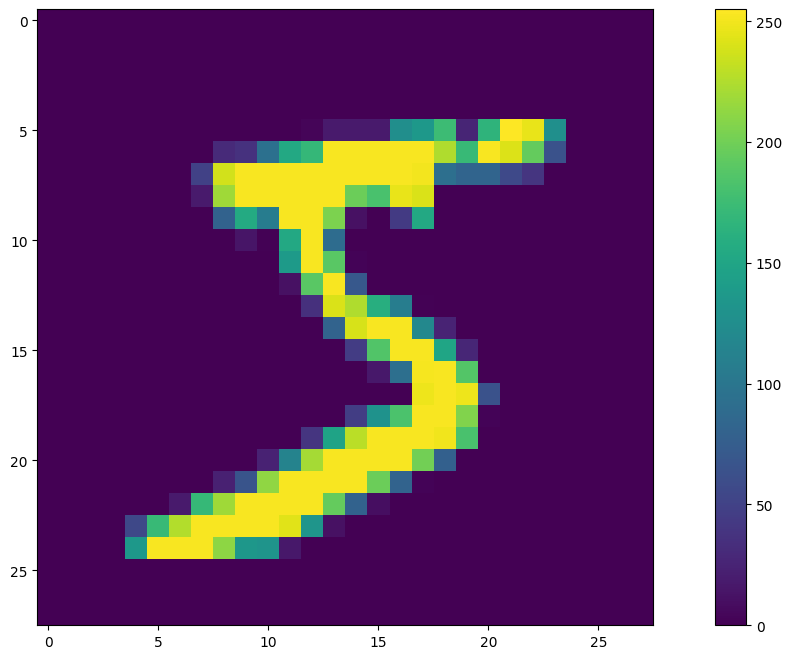

In [12]:
# show the first image
plt.figure(figsize=(16,8))
plt.imshow(x_mnist[0].reshape(28, 28))
plt.colorbar()

,0,1,2,3,4,5,6,7
0,3,0,5,7,7,6,7,3
1,1,2,8,9,1,0,7,7
2,1,3,1,3,9,3,0,2
3,9,7,7,8,4,3,0,2
4,5,8,9,9,2,6,1,3
5,4,7,7,7,1,4,4,7
6,7,0,5,2,9,8,4,1
7,2,6,0,4,6,4,1,5
8,8,8,2,0,7,1,7,3
9,0,6,7,3,7,3,8,1


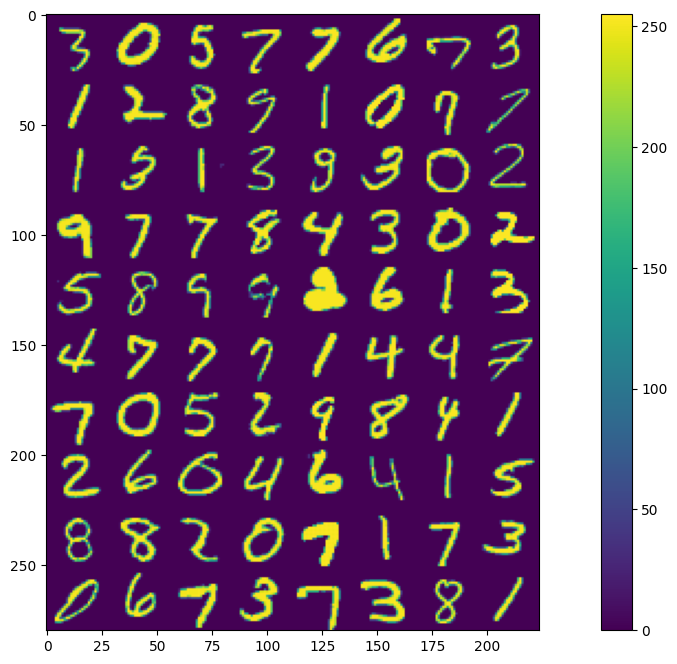

In [45]:
N = 8   # columns
M = 10  # rows

# array to hold results
image_samples = None
image_labels = np.array([])

# generate a random permutation to sample dataset
permuted_array = np.random.permutation(y_mnist.shape[0])

# loop along rows
for m in range(M):
    # loop along columns to generate a single row
    for n in range(N):
        # get a random permutation index
        permute_idx = permuted_array[m*M + n]

        # get image at the permuted index
        image = x_mnist[permute_idx].reshape(28, 28)
        label = y_mnist[permute_idx]

        # generate a single row
        image_samples_row = image if n == 0 else np.hstack((image_samples_row, image))
        # image_labels.append(label)
        image_labels = np.append(image_labels, label)

    # append rows
    image_samples = image_samples_row if image_samples is None else np.vstack((image_samples, image_samples_row))

# show grid of images
plt.figure(figsize=(16,8))
plt.imshow(image_samples)
plt.colorbar()

# show grid of ground truth data
display(pd.DataFrame(image_labels.reshape(M,N)))

## Viewing a Single Image

In [55]:
# convert sample data into floating point for higher dynamic range manipulation
x_mnist = x_mnist.astype(np.float64)

###### print the label
print(f'{y_mnist[permute_idx] = }')
print(f'{x_mnist[permute_idx] = }')

y_mnist[permute_idx] = '1'
x_mnist[permute_idx] = array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 168., 255.,
        92.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
 

Intuitively, one can see that the majority of pixels are white, or 0. Very few pixels of the whole 28x28 grid are actually non-zero.

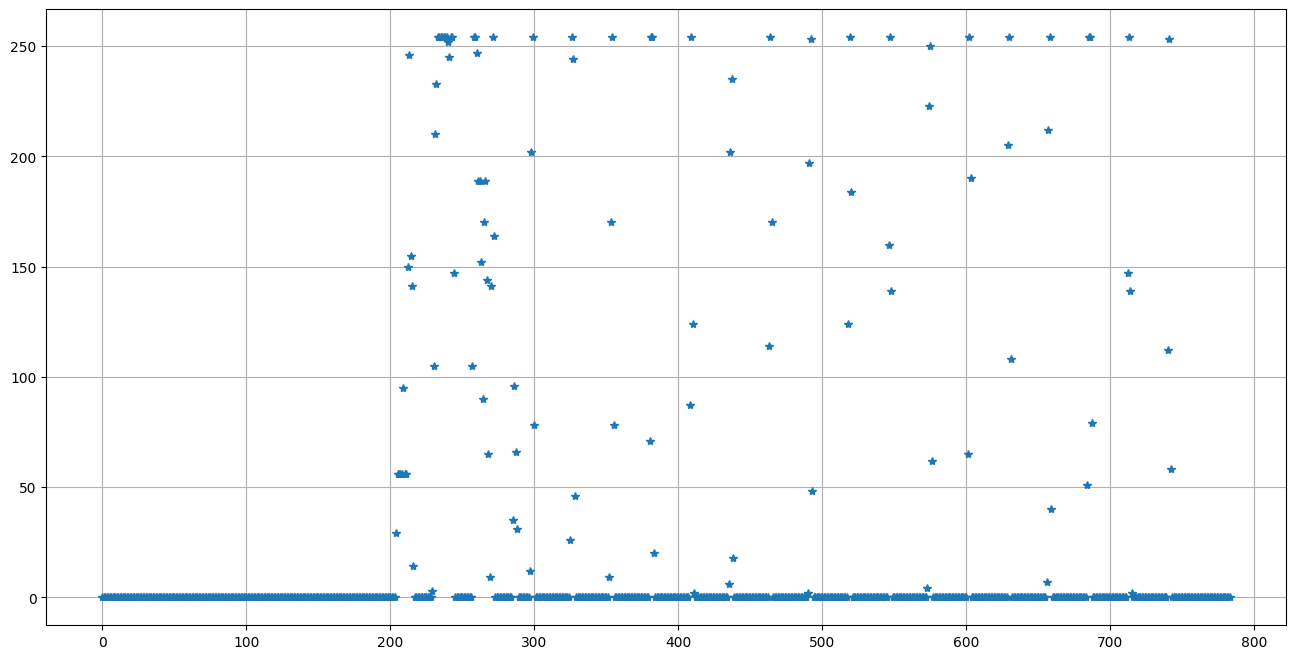

In [73]:
plt.figure(figsize=(16,8))
plt.plot(x_mnist[permute_idx], '*')
plt.grid()

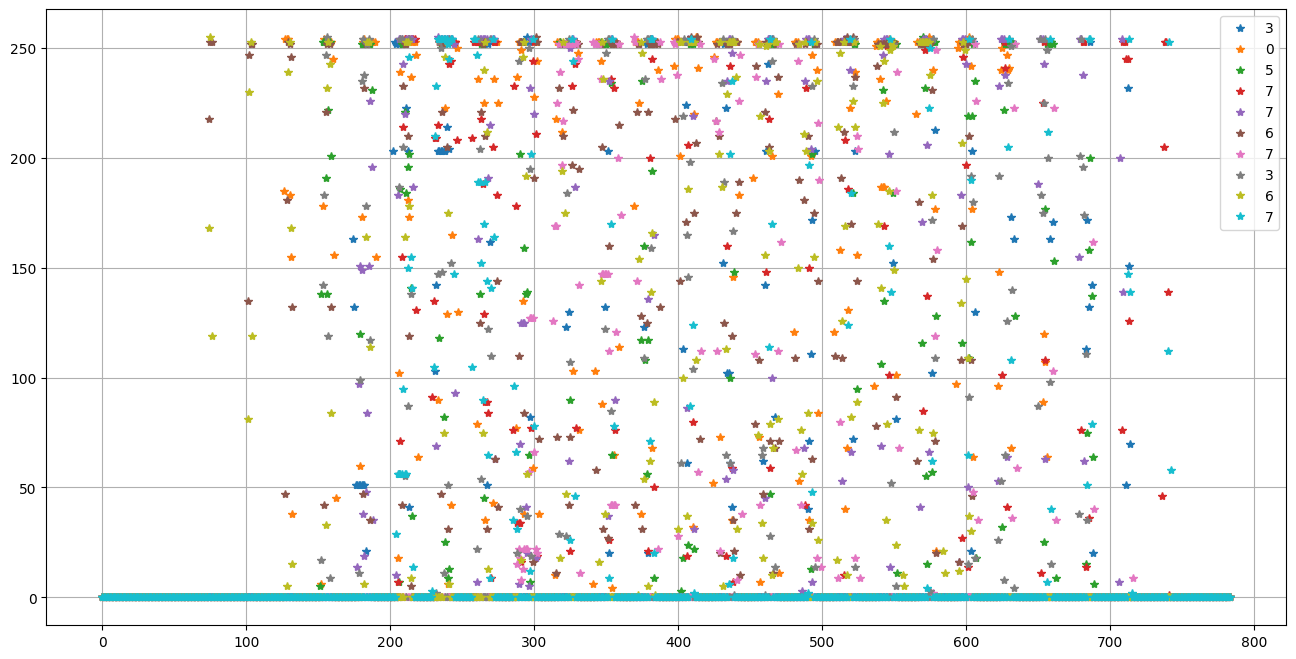

In [72]:
plt.figure(figsize=(16,8))
for idx in range(10):
    permute_idx = permuted_array[idx]
    plt.plot(x_mnist[permute_idx], '*', label=y_mnist[permute_idx])
plt.legend()
plt.grid()
    
# x_mnist[permute_idx:permute_idx+10]
